# Test reading and plotting coefficients with pyEXP

We begin by importing `pyEXP` and friends and setting the working directory.

In [15]:
import os
import yaml
import pyEXP
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 9]

# In this test, I assume that you have some directory with a simulation that has 
# a cylindrical component.  Here, I am testing a CBrockDisk simulation from Mike P.
#
os.chdir('/data/Nbody/FlatDisk')

## Reading the disk coefficients
We created the halo coefficients in the last notebook and stashed them in the EXP HDF5 format.  Now, we'll read them back.

In [16]:
# Reread the coefs from the file.  These are new HDF5 coefficients sets.
#
coefs = pyEXP.coefs.Coefs.factory('outcoef.disk.run0.h5')

print("Got coefs for name=", coefs.getName())

Got coefs for name= disk


Now get the time vector and data tensor. Plot some coefficient series as a function of time.

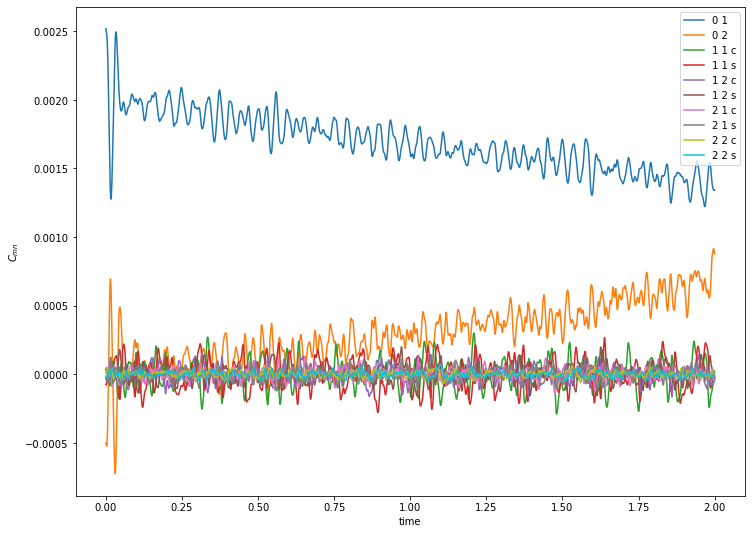

In [17]:
times = coefs.Times()
data  = coefs.getAllCoefs()

for m in range(3):
    for n in range(1,3):
        if m==0:
            plt.plot(times, np.real(data[m, n, :]), label='{} {}'.format(m, n))
        else:
            plt.plot(times, np.real(data[m, n, :]), label='{} {} c'.format(m, n))
            plt.plot(times, np.imag(data[m, n, :]), label='{} {} s'.format(m, n))
plt.xlabel('time')
plt.ylabel(r'$C_{mn}$')
plt.legend()
plt.show()

## Repeat with the 'better' example
Here we have both cylindrical and spherical coefficients sets.  So I'll read both in and plot their coefficients sepearately.

In [18]:
os.chdir('/home/weinberg/Nbody/Better')
coefs_star = pyEXP.coefs.Coefs.factory('outcoef.star.run2.h5')
coefs_dark = pyEXP.coefs.Coefs.factory('outcoef.dark.run2.h5')

print("Got coefs for name=", coefs_star.getName(), ",", coefs_dark.getName())

Got coefs for name= star disk , dark halo


First plot the cylindrical coefficients:

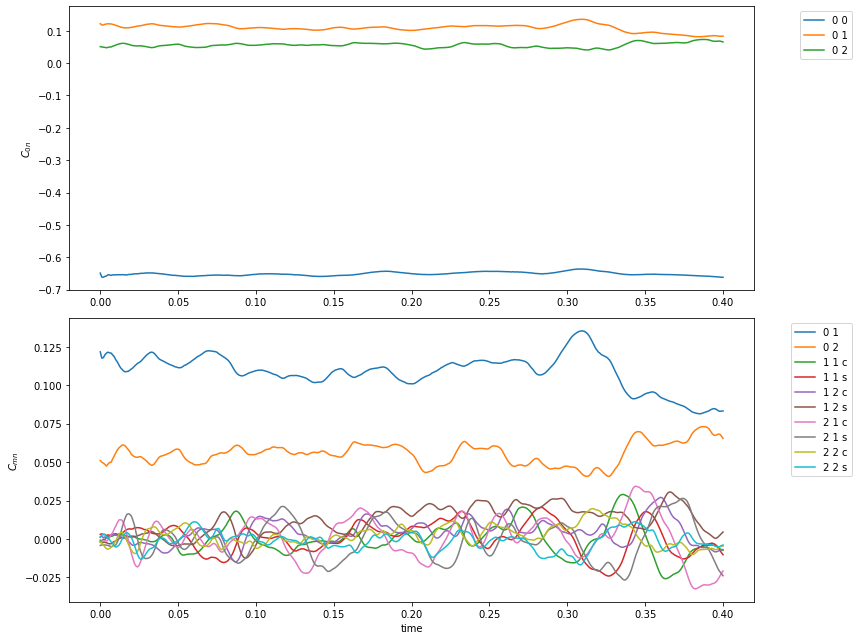

In [38]:
times = coefs_star.Times()
data  = coefs_star.getAllCoefs()

fig, ax = plt.subplots(2, 1)
for n in range(0, 3):
    ax[0].plot(times, np.real(data[0, n, :]), label='{} {}'.format(0, n))
ax[0].set_ylabel(r'$C_{0n}$')
ax[0].legend(bbox_to_anchor=(1.15, 1.0))

for m in range(3):
    for n in range(1,3):
        if m==0:
            ax[1].plot(times, np.real(data[m, n, :]), label='{} {}'.format(m, n))
        else:
            ax[1].plot(times, np.real(data[m, n, :]), label='{} {} c'.format(m, n))
            ax[1].plot(times, np.imag(data[m, n, :]), label='{} {} s'.format(m, n))
ax[1].set_xlabel('time')
ax[1].set_ylabel(r'$C_{mn}$')
ax[1].legend(bbox_to_anchor=(1.15, 1.0))

plt.tight_layout()
plt.show()

Now plot the spherical set.  Note: I define spherical coefficients are indexed for from $l=0$, to $l=l_{max}$ serially.  That is, the coefficients are packing with a single index that denotes: $(l,m)=\{(0, 0), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2), (3, 0), ...\}$.   The linear index can be computed as $I(l, m) = l(l+1)/2+m$.

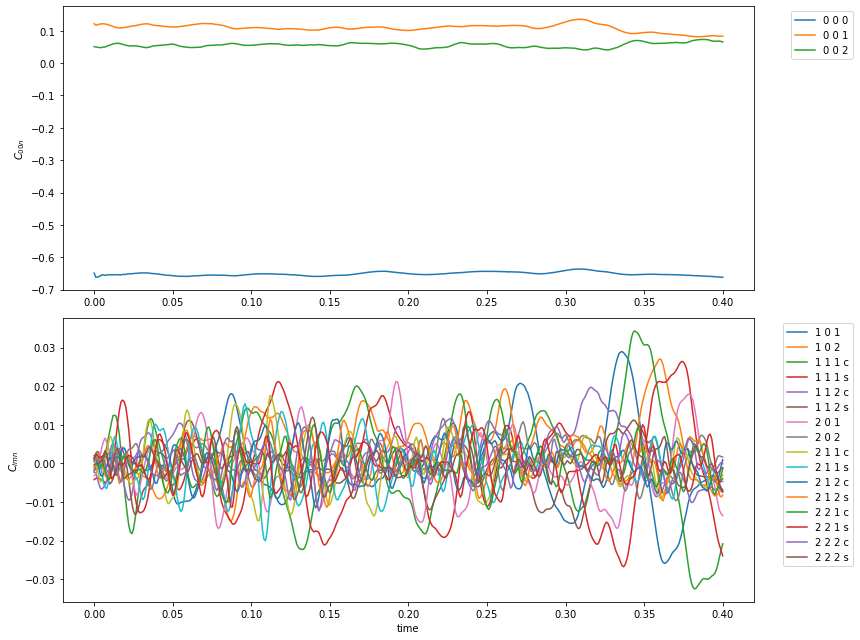

In [40]:
times = coefs_star.Times()
data  = coefs_star.getAllCoefs()

def I(l, m):
    return int(l*(l+1)/2) + m

fig, ax = plt.subplots(2, 1)
for n in range(0, 3):
    ax[0].plot(times, np.real(data[0, n, :]), label='{} {} {}'.format(0, 0, n))
ax[0].set_ylabel(r'$C_{00n}$')
ax[0].legend(bbox_to_anchor=(1.15, 1.0))

for l in range(1,3):
    for m in range(l+1):
        for n in range(1,3):
            if m==0:
                ax[1].plot(times, np.real(data[I(l, m), n, :]), label='{} {} {}'.format(l, m, n))
            else:
                ax[1].plot(times, np.real(data[I(l, m), n, :]), label='{} {} {} c'.format(l, m, n))
                ax[1].plot(times, np.imag(data[I(l, m), n, :]), label='{} {} {} s'.format(l, m, n))
ax[1].set_xlabel('time')
ax[1].set_ylabel(r'$C_{lmn}$')
ax[1].legend(bbox_to_anchor=(1.15, 1.0))

plt.tight_layout()
plt.show()